In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
import warnings as wr
wr.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

In [7]:
data = pd.read_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/application_train.csv")

In [8]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for col in data.columns:
  print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [10]:
data.shape

(307511, 122)

In [59]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
cat_cols = data.select_dtypes('object').columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [13]:
len(np.where(data.isnull())[0])

9152465

Feature Engineering 1: Remove Null values, One Hot encoding, feature scaling 

In [14]:
data= pd.get_dummies(data)

In [15]:
y = data['TARGET']
X = data.drop('TARGET',axis = 1)

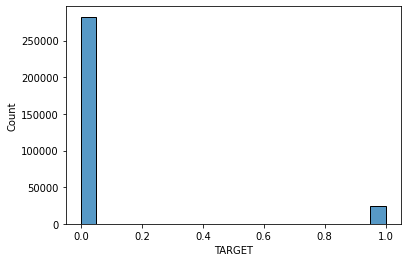

In [65]:
sns.histplot(y)

In [16]:
np.where(y.isnull())

(array([], dtype=int64),)

In [17]:
imputer = SimpleImputer(strategy = 'median')
X_imp = imputer.fit_transform(X)
scaler = MinMaxScaler(feature_range = (0, 1))
X_scl = scaler.fit_transform(X_imp)

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X_scl,y, test_size=0.2, random_state=11)

In [19]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((246008, 245), (61503, 245), (246008,), (61503,))

Model 1: Decision Tree

In [20]:
clf=DecisionTreeClassifier()
params={'max_depth': [1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

In [21]:
GSCV=GridSearchCV(clf,param_grid=params,cv=3,scoring='roc_auc',verbose=1,return_train_score=True)
GSCV.fit(X_train,y_train)
result=pd.DataFrame(GSCV.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [19]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.192000,0.854631,0.258307,0.254637,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
1,1.265145,0.007753,0.074745,0.001261,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
2,1.273720,0.014346,0.075432,0.001856,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
3,1.271886,0.006757,0.074173,0.000442,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
4,5.610832,0.489619,0.081750,0.000772,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.699966,0.709405,0.706308,0.705226,0.003929,4,0.711914,0.709910,0.711783,0.711202,0.000916
5,5.350521,0.046064,0.082053,0.000610,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.699966,0.709405,0.706308,0.705226,0.003929,4,0.711914,0.709910,0.711783,0.711202,0.000916
6,5.510770,0.298119,0.082874,0.003605,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.699966,0.709405,0.706309,0.705227,0.003929,3,0.711914,0.709910,0.711782,0.711202,0.000915
7,5.339544,0.026772,0.083671,0.001288,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.699937,0.709365,0.706356,0.705219,0.003932,6,0.711831,0.709869,0.711755,0.711152,0.000908
8,10.029792,0.958850,0.090411,0.003033,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.699094,0.702921,0.701682,0.701232,0.001594,8,0.750340,0.750206,0.749143,0.749896,0.000536
9,9.295776,0.050225,0.087703,0.001817,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.698904,0.703496,0.703133,0.701844,0.002084,7,0.749735,0.749557,0.748625,0.749306,0.000487


In [ ]:
best_params=GSCV.best_params_
best_params

In [ ]:
rparams=result['params']
maxdepth = [i['max_depth'] for i in rparams]
minsamsplit = [i['min_samples_split'] for i in rparams]
print('max_depth: ',maxdepth)
print('min_samples_split: ',minsamsplit)
train_scores=result['mean_train_score'].values
print('\n\ntrain_scores: ',train_scores)
cv_scores=result['mean_test_score'].values
print('\n\ncv_scores: ',cv_scores)
trrespd=pd.DataFrame(train_scores.reshape(len(params['max_depth']),4),index=params['max_depth'],columns=params['min_samples_split'])
terespd=pd.DataFrame(cv_scores.reshape(len(params['max_depth']),4),index=params['max_depth'],columns=params['min_samples_split'])

Text(0.5, 1.0, 'train scores')

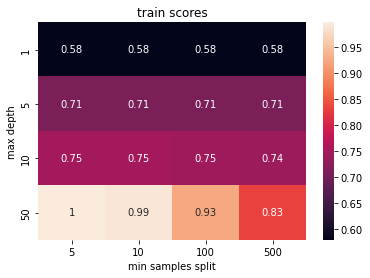

In [22]:
ax=sns.heatmap(trrespd,annot=True)
ax.set_xlabel('min samples split')
ax.set_ylabel('max depth')
ax.set_title('train scores')

Text(0.5, 1.0, 'cv scores')

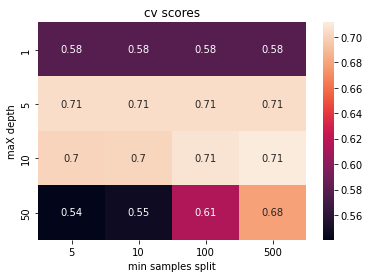

In [23]:
ax=sns.heatmap(terespd,annot=True)
ax.set_xlabel('min samples split')
ax.set_ylabel('maX depth')
ax.set_title('cv scores')

In [ ]:
best_param=GSCV.best_params_
clf=DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'])
clf.fit(X_train,y_train)
train_proba=clf.predict_proba(X_train)[:,1]
test_proba=clf.predict_proba(X_test)[:,1]
trfpr,trtpr,trthres=roc_curve(y_train,train_proba)
tefpr,tetpr,tethres=roc_curve(y_test,test_proba)

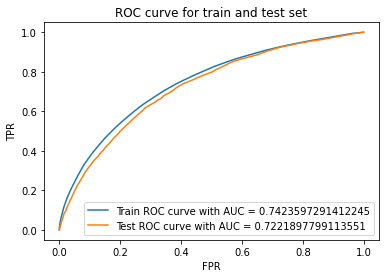

In [25]:
plt.plot(trfpr,trtpr,label='Train ROC curve with AUC = '+str(auc(trfpr,trtpr)))
plt.plot(tefpr,tetpr,label='Test ROC curve with AUC = '+str(auc(tefpr,tetpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve for train and test set')
plt.show()

In [ ]:
index=np.argmax(trtpr*(1-trfpr))
threshold=trthres[index]

In [ ]:
def predict_using_threshold(proba,threshold):
    predictions=[]
    for result in proba:
        if result>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
train_result=predict_using_threshold(train_proba,threshold)
test_result=predict_using_threshold(test_proba,threshold)

In [29]:
print('Train Confusion matrix:\n\n')
print(confusion_matrix(train_result,y_train))
print('\n***************************\n')
print('Test Confusion matrix:\n\n')
print(confusion_matrix(test_result,y_test))

Train Confusion matrix:


[[153821   6344]
 [ 72331  13512]]

***************************

Test Confusion matrix:


[[38411  1713]
 [18123  3256]]


Model 2: GBDT

In [30]:
clf=GradientBoostingClassifier()
params={'learning_rate':[0.001, 0.01, 0.1, 0.2] ,'n_estimators':[5,10,75, 100]}

In [31]:
GSCV=GridSearchCV(clf,param_grid=params,cv=3,scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)
GSCV.fit(X_train,y_train)
result=pd.DataFrame(GSCV.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [32]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,26.381933,0.372129,0.166105,0.003270,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.676021,0.687378,0.683226,0.682208,0.004692,16,0.685753,0.683228,0.684132,0.684371,0.001045
1,51.684821,0.465875,0.223690,0.023879,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.677898,0.687378,0.684773,0.683349,0.003999,15,0.687939,0.683228,0.685852,0.685673,0.001927
2,377.153004,1.868639,0.592064,0.009135,0.001,75,"{'learning_rate': 0.001, 'n_estimators': 75}",0.692002,0.693830,0.687942,0.691258,0.002461,13,0.701312,0.689338,0.689422,0.693357,0.005625
3,507.883537,4.902973,0.782165,0.010699,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.692860,0.695922,0.698299,0.695694,0.002226,11,0.702604,0.691521,0.698874,0.697666,0.004605
4,26.699019,1.207263,0.170720,0.007360,0.01,5,"{'learning_rate': 0.01, 'n_estimators': 5}",0.680802,0.692332,0.686043,0.686393,0.004713,14,0.690038,0.687631,0.687484,0.688384,0.001171
5,50.917851,0.166234,0.201804,0.007890,0.01,10,"{'learning_rate': 0.01, 'n_estimators': 10}",0.692210,0.694717,0.691258,0.692728,0.001459,12,0.701869,0.690085,0.691782,0.694579,0.005202
6,381.146191,0.302359,0.625064,0.016618,0.01,75,"{'learning_rate': 0.01, 'n_estimators': 75}",0.700805,0.712966,0.711197,0.708323,0.005364,9,0.712134,0.709349,0.712382,0.711289,0.001375
7,516.191354,2.651472,0.790619,0.017341,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.705847,0.716981,0.714153,0.712327,0.004725,6,0.717813,0.713593,0.715655,0.715687,0.001723
8,26.186121,0.577681,0.165721,0.007799,0.1,5,"{'learning_rate': 0.1, 'n_estimators': 5}",0.697592,0.707875,0.704767,0.703412,0.004306,10,0.708580,0.703362,0.705201,0.705715,0.002161
9,51.414482,0.099968,0.204470,0.001723,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.705650,0.716645,0.714261,0.712185,0.004723,7,0.717188,0.713218,0.716410,0.715606,0.001718


In [33]:
best_params=GSCV.best_params_
best_params

{'learning_rate': 0.2, 'n_estimators': 100}

In [37]:
rparams=result['params']
maxdepth = [i['learning_rate'] for i in rparams]
nestimator = [i['n_estimators'] for i in rparams]
print('learning_rate: ',maxdepth)
print('n_estimator: ',nestimator)
train_scores=result['mean_train_score'].values
print('\n\ntrain_scores: ',train_scores)
cv_scores=result['mean_test_score'].values
print('\n\ncv_scores: ',cv_scores)

learning_rate:  [0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2]
n_estimator:  [5, 10, 75, 100, 5, 10, 75, 100, 5, 10, 75, 100, 5, 10, 75, 100]


train_scores:  [0.68437123 0.68567296 0.69335738 0.69766624 0.68838426 0.69457864
 0.7112886  0.71568689 0.70571457 0.71560566 0.7568423  0.76164615
 0.71498834 0.72973293 0.7666294  0.77137246]


cv_scores:  [0.68220832 0.68334943 0.69125813 0.69569381 0.68639253 0.69272811
 0.70832272 0.71232686 0.70341151 0.71218509 0.74636209 0.74891611
 0.71127801 0.72440407 0.75096705 0.75230627]


Text(0.5, 1.0, 'train scores')

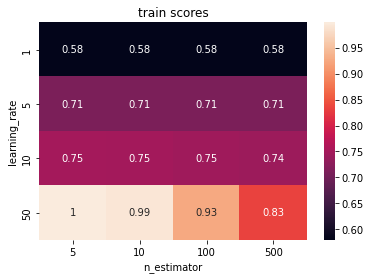

In [39]:
ax=sns.heatmap(trrespd,annot=True)
ax.set_xlabel('n_estimator')
ax.set_ylabel('learning_rate')
ax.set_title('train scores')

Text(0.5, 1.0, 'cv scores')

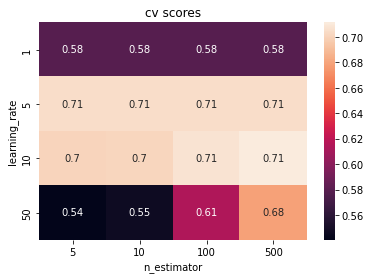

In [36]:
ax=sns.heatmap(terespd,annot=True)
ax.set_xlabel('n_estimator')
ax.set_ylabel('learning_rate')
ax.set_title('cv scores')

In [45]:
best_param=GSCV.best_params_
clf=GradientBoostingClassifier(learning_rate=best_param['learning_rate'] ,n_estimators=best_param['n_estimators'])
clf.fit(X_train,y_train)
train_proba=clf.predict_proba(X_train)[:,1]
test_proba=clf.predict_proba(X_test)[:,1]
trfpr,trtpr,trthres=roc_curve(y_train,train_proba)
tefpr,tetpr,tethres=roc_curve(y_test,test_proba)

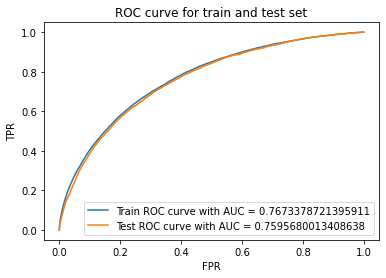

In [46]:
plt.plot(trfpr,trtpr,label='Train ROC curve with AUC = '+str(auc(trfpr,trtpr)))
plt.plot(tefpr,tetpr,label='Test ROC curve with AUC = '+str(auc(tefpr,tetpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve for train and test set')
plt.show()

In [47]:
index=np.argmax(trtpr*(1-trfpr))
threshold=trthres[index]

In [48]:
def predict_using_threshold(proba,threshold):
    predictions=[]
    for result in proba:
        if result>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [49]:
train_result=predict_using_threshold(train_proba,threshold)
test_result=predict_using_threshold(test_proba,threshold)

Train Confusion matrix:




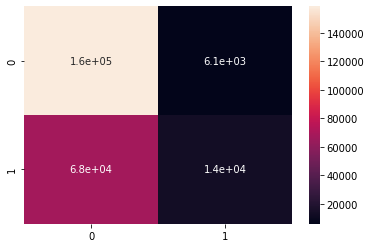

In [50]:
print('Train Confusion matrix:\n\n')
sns.heatmap(confusion_matrix(train_result,y_train),annot=True)

Test Confusion matrix:




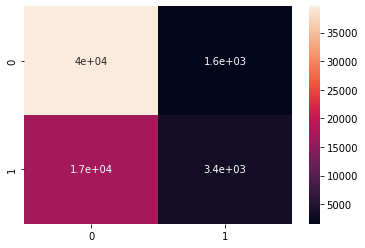

In [51]:
print('Test Confusion matrix:\n\n')
sns.heatmap(confusion_matrix(test_result,y_test),annot=True)

Feature Engineering 2: Adding new columns based on domain knowledge

In [67]:
X['CREDIT_INCOME_PERCENT'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
X['ANNUITY_INCOME_PERCENT'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
X['CREDIT_TERM'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']

In [69]:
imputer = SimpleImputer(strategy = 'median')
X_imp = imputer.fit_transform(X)
scaler = MinMaxScaler(feature_range = (0, 1))
X_scl = scaler.fit_transform(X_imp)

In [70]:
X_train, X_test, y_train,y_test = train_test_split(X_scl,y, test_size=0.2, random_state=11)

In [71]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((246008, 249), (61503, 249), (246008,), (61503,))

Model 3: Decision Tree

In [72]:
clf=DecisionTreeClassifier()
params={'max_depth': [1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

In [73]:
GSCV=GridSearchCV(clf,param_grid=params,cv=3,scoring='roc_auc',verbose=1,return_train_score=True)
GSCV.fit(X_train,y_train)
result=pd.DataFrame(GSCV.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [74]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.500629,0.011335,0.080265,0.008963,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
1,1.484735,0.011744,0.076155,0.003261,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
2,1.479721,0.009860,0.073719,0.000909,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
3,1.489726,0.008530,0.073565,0.000382,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.571563,0.588306,0.576017,0.578629,0.007081,11,0.577549,0.586131,0.576127,0.579936,0.004419
4,6.982794,0.629887,0.081542,0.000284,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.699966,0.709402,0.706308,0.705225,0.003928,4,0.711914,0.709921,0.711783,0.711206,0.000910
5,6.526469,0.030829,0.081335,0.000802,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.699966,0.709402,0.706308,0.705225,0.003928,4,0.711914,0.709921,0.711783,0.711206,0.000910
6,6.724621,0.319287,0.081257,0.000984,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.699966,0.709402,0.706309,0.705225,0.003928,3,0.711914,0.709921,0.711782,0.711206,0.000910
7,6.542156,0.005582,0.082631,0.002497,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.699937,0.709362,0.706356,0.705218,0.003931,6,0.711831,0.709880,0.711755,0.711155,0.000902
8,11.870607,0.047862,0.089717,0.002972,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.699859,0.705288,0.700172,0.701773,0.002489,8,0.751111,0.749999,0.750973,0.750694,0.000495
9,12.250948,0.423645,0.088126,0.000895,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.700780,0.705492,0.700602,0.702291,0.002264,7,0.750531,0.749745,0.750446,0.750240,0.000352


In [75]:
best_params=GSCV.best_params_
best_params

{'max_depth': 10, 'min_samples_split': 500}

In [76]:
rparams=result['params']
maxdepth = [i['max_depth'] for i in rparams]
minsamsplit = [i['min_samples_split'] for i in rparams]
print('max_depth: ',maxdepth)
print('min_samples_split: ',minsamsplit)
train_scores=result['mean_train_score'].values
print('\n\ntrain_scores: ',train_scores)
cv_scores=result['mean_test_score'].values
print('\n\ncv_scores: ',cv_scores)
trrespd=pd.DataFrame(train_scores.reshape(len(params['max_depth']),4),index=params['max_depth'],columns=params['min_samples_split'])
terespd=pd.DataFrame(cv_scores.reshape(len(params['max_depth']),4),index=params['max_depth'],columns=params['min_samples_split'])

max_depth:  [1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 50, 50, 50, 50]
min_samples_split:  [5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500, 5, 10, 100, 500]


train_scores:  [0.57993552 0.57993552 0.57993552 0.57993552 0.71120578 0.71120578
 0.71120559 0.71115539 0.75069435 0.7502404  0.74681612 0.74328909
 0.99837753 0.9922059  0.93059651 0.83522445]


cv_scores:  [0.57862855 0.57862855 0.57862855 0.57862855 0.70522537 0.70522537
 0.70522549 0.70521818 0.70177316 0.70229132 0.70771682 0.71143766
 0.53775136 0.54677742 0.61368649 0.67999907]


Text(0.5, 1.0, 'train scores')

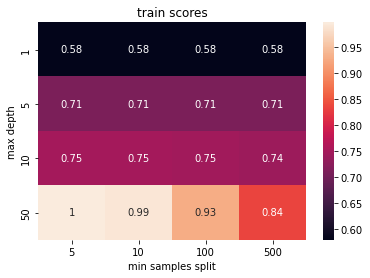

In [77]:
ax=sns.heatmap(trrespd,annot=True)
ax.set_xlabel('min samples split')
ax.set_ylabel('max depth')
ax.set_title('train scores')

Text(0.5, 1.0, 'cv scores')

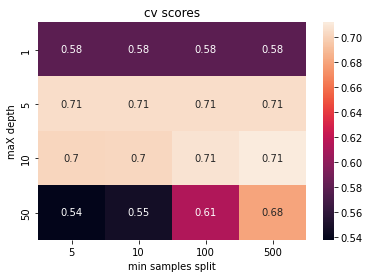

In [78]:
ax=sns.heatmap(terespd,annot=True)
ax.set_xlabel('min samples split')
ax.set_ylabel('maX depth')
ax.set_title('cv scores')

In [79]:
best_param=GSCV.best_params_
clf=DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'])
clf.fit(X_train,y_train)
train_proba=clf.predict_proba(X_train)[:,1]
test_proba=clf.predict_proba(X_test)[:,1]
trfpr,trtpr,trthres=roc_curve(y_train,train_proba)
tefpr,tetpr,tethres=roc_curve(y_test,test_proba)

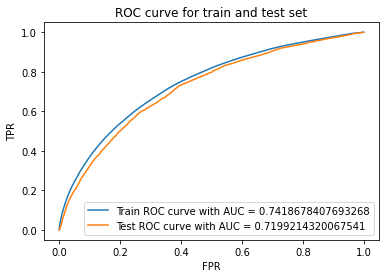

In [80]:
plt.plot(trfpr,trtpr,label='Train ROC curve with AUC = '+str(auc(trfpr,trtpr)))
plt.plot(tefpr,tetpr,label='Test ROC curve with AUC = '+str(auc(tefpr,tetpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve for train and test set')
plt.show()

In [81]:
index=np.argmax(trtpr*(1-trfpr))
threshold=trthres[index]

In [82]:
def predict_using_threshold(proba,threshold):
    predictions=[]
    for result in proba:
        if result>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [83]:
train_result=predict_using_threshold(train_proba,threshold)
test_result=predict_using_threshold(test_proba,threshold)

In [84]:
print('Train Confusion matrix:\n\n')
print(confusion_matrix(train_result,y_train))
print('\n***************************\n')
print('Test Confusion matrix:\n\n')
print(confusion_matrix(test_result,y_test))

Train Confusion matrix:


[[153459   6364]
 [ 72693  13492]]

***************************

Test Confusion matrix:


[[38344  1759]
 [18190  3210]]


Model 4: GBDT

In [85]:
clf=GradientBoostingClassifier()
params={'learning_rate':[0.001, 0.01, 0.1, 0.2] ,'n_estimators':[5,10,75, 100]}

In [86]:
GSCV=GridSearchCV(clf,param_grid=params,cv=3,scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)
GSCV.fit(X_train,y_train)
result=pd.DataFrame(GSCV.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [87]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.077153,1.087967,0.173800,0.007385,0.001,5,"{'learning_rate': 0.001, 'n_estimators': 5}",0.676021,0.687378,0.683226,0.682208,0.004692,16,0.685753,0.683228,0.684132,0.684371,0.001045
1,62.767447,0.350272,0.207310,0.006770,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.677898,0.687378,0.684773,0.683349,0.003999,15,0.687939,0.683228,0.685852,0.685673,0.001927
2,470.842937,0.552253,0.640392,0.001985,0.001,75,"{'learning_rate': 0.001, 'n_estimators': 75}",0.692002,0.693830,0.687942,0.691258,0.002461,13,0.701312,0.689338,0.689422,0.693357,0.005625
3,626.271267,2.409762,0.814592,0.008937,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.692860,0.695922,0.698299,0.695694,0.002226,11,0.702604,0.691521,0.698874,0.697666,0.004605
4,31.229712,0.139772,0.164397,0.003804,0.01,5,"{'learning_rate': 0.01, 'n_estimators': 5}",0.680802,0.692332,0.686043,0.686393,0.004713,14,0.690038,0.687631,0.687484,0.688384,0.001171
5,62.702571,0.537446,0.200996,0.007092,0.01,10,"{'learning_rate': 0.01, 'n_estimators': 10}",0.692210,0.694717,0.691258,0.692728,0.001459,12,0.701869,0.690085,0.691782,0.694579,0.005202
6,468.454871,1.434313,0.664988,0.009629,0.01,75,"{'learning_rate': 0.01, 'n_estimators': 75}",0.700805,0.712966,0.711197,0.708323,0.005364,9,0.712134,0.709349,0.712382,0.711289,0.001375
7,625.058645,0.176717,0.832187,0.012054,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.706072,0.716978,0.714152,0.712401,0.004621,6,0.717979,0.713593,0.715662,0.715745,0.001792
8,31.537240,0.242531,0.163305,0.001164,0.1,5,"{'learning_rate': 0.1, 'n_estimators': 5}",0.697592,0.707875,0.704767,0.703412,0.004306,10,0.708580,0.703362,0.705201,0.705715,0.002161
9,61.916751,0.663873,0.212848,0.007056,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.705650,0.716645,0.714261,0.712185,0.004723,7,0.717188,0.713218,0.716410,0.715606,0.001718


In [88]:
best_params=GSCV.best_params_
best_params

{'learning_rate': 0.2, 'n_estimators': 100}

In [89]:
rparams=result['params']
maxdepth = [i['learning_rate'] for i in rparams]
nestimator = [i['n_estimators'] for i in rparams]
print('learning_rate: ',maxdepth)
print('n_estimator: ',nestimator)
train_scores=result['mean_train_score'].values
print('\n\ntrain_scores: ',train_scores)
cv_scores=result['mean_test_score'].values
print('\n\ncv_scores: ',cv_scores)

learning_rate:  [0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2]
n_estimator:  [5, 10, 75, 100, 5, 10, 75, 100, 5, 10, 75, 100, 5, 10, 75, 100]


train_scores:  [0.68437123 0.68567296 0.69335738 0.69766624 0.68838426 0.69457864
 0.71128856 0.71574489 0.70571457 0.71560566 0.76168521 0.76716531
 0.71498834 0.73186134 0.7731648  0.7784921 ]


cv_scores:  [0.68220832 0.68334943 0.69125813 0.69569381 0.68639253 0.69272811
 0.70832278 0.71240081 0.70341151 0.71218509 0.75149907 0.75474029
 0.71127801 0.7268265  0.75730228 0.75966669]


Text(0.5, 1.0, 'train scores')

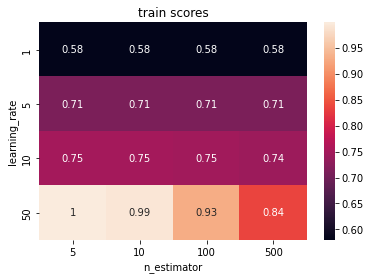

In [90]:
ax=sns.heatmap(trrespd,annot=True)
ax.set_xlabel('n_estimator')
ax.set_ylabel('learning_rate')
ax.set_title('train scores')

Text(0.5, 1.0, 'cv scores')

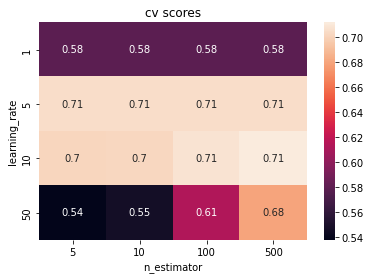

In [91]:
ax=sns.heatmap(terespd,annot=True)
ax.set_xlabel('n_estimator')
ax.set_ylabel('learning_rate')
ax.set_title('cv scores')

In [92]:
best_param=GSCV.best_params_
clf=GradientBoostingClassifier(learning_rate=best_param['learning_rate'] ,n_estimators=best_param['n_estimators'])
clf.fit(X_train,y_train)
train_proba=clf.predict_proba(X_train)[:,1]
test_proba=clf.predict_proba(X_test)[:,1]
trfpr,trtpr,trthres=roc_curve(y_train,train_proba)
tefpr,tetpr,tethres=roc_curve(y_test,test_proba)

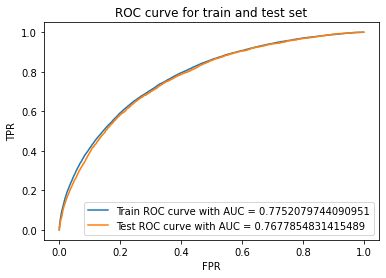

In [93]:
plt.plot(trfpr,trtpr,label='Train ROC curve with AUC = '+str(auc(trfpr,trtpr)))
plt.plot(tefpr,tetpr,label='Test ROC curve with AUC = '+str(auc(tefpr,tetpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve for train and test set')
plt.show()

In [94]:
index=np.argmax(trtpr*(1-trfpr))
threshold=trthres[index]

In [95]:
def predict_using_threshold(proba,threshold):
    predictions=[]
    for result in proba:
        if result>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [96]:
train_result=predict_using_threshold(train_proba,threshold)
test_result=predict_using_threshold(test_proba,threshold)

Train Confusion matrix:




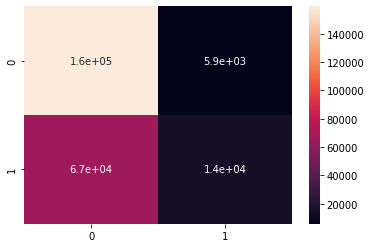

In [97]:
print('Train Confusion matrix:\n\n')
sns.heatmap(confusion_matrix(train_result,y_train),annot=True)

Test Confusion matrix:




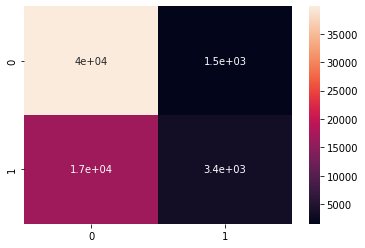

In [98]:
print('Test Confusion matrix:\n\n')
sns.heatmap(confusion_matrix(test_result,y_test),annot=True)

Feature Engineering 3: Removal of features

In [102]:
fs = SelectKBest(k=30)
X_selected = fs.fit_transform(X_scl, y)

In [124]:
X_train, X_test, y_train,y_test = train_test_split(X_scl,y, test_size=0.2, random_state=11,stratify = y)

In [125]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((246008, 249), (61503, 249), (246008,), (61503,))

Model 5: Decision Tree

In [126]:
clf=DecisionTreeClassifier(max_depth=10,min_samples_split=500)
clf.fit(X_train,y_train)
train_proba=clf.predict_proba(X_train)[:,1]
test_proba=clf.predict_proba(X_test)[:,1]
trfpr,trtpr,trthres=roc_curve(y_train,train_proba)
tefpr,tetpr,tethres=roc_curve(y_test,test_proba)

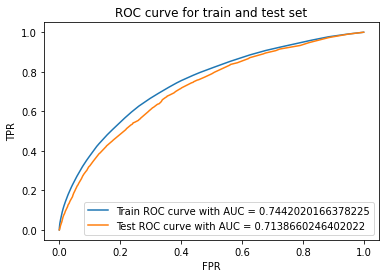

In [127]:
plt.plot(trfpr,trtpr,label='Train ROC curve with AUC = '+str(auc(trfpr,trtpr)))
plt.plot(tefpr,tetpr,label='Test ROC curve with AUC = '+str(auc(tefpr,tetpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve for train and test set')
plt.show()

In [128]:
index=np.argmax(trtpr*(1-trfpr))
threshold=trthres[index]

In [129]:
def predict_using_threshold(proba,threshold):
    predictions=[]
    for result in proba:
        if result>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [130]:
train_result=predict_using_threshold(train_proba,threshold)
test_result=predict_using_threshold(test_proba,threshold)

In [131]:
print('Train Confusion matrix:\n\n')
print(confusion_matrix(train_result,y_train))
print('\n***************************\n')
print('Test Confusion matrix:\n\n')
print(confusion_matrix(test_result,y_test))

Train Confusion matrix:


[[157921   6586]
 [ 68227  13274]]

***************************

Test Confusion matrix:


[[39206  1896]
 [17332  3069]]


Model 6: GBDT

In [132]:
clf=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
clf.fit(X_train,y_train)
train_proba=clf.predict_proba(X_train)[:,1]
test_proba=clf.predict_proba(X_test)[:,1]
trfpr,trtpr,trthres=roc_curve(y_train,train_proba)
tefpr,tetpr,tethres=roc_curve(y_test,test_proba)

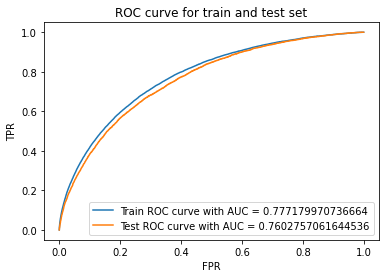

In [133]:
plt.plot(trfpr,trtpr,label='Train ROC curve with AUC = '+str(auc(trfpr,trtpr)))
plt.plot(tefpr,tetpr,label='Test ROC curve with AUC = '+str(auc(tefpr,tetpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve for train and test set')
plt.show()

In [134]:
index=np.argmax(trtpr*(1-trfpr))
threshold=trthres[index]

In [135]:
def predict_using_threshold(proba,threshold):
    predictions=[]
    for result in proba:
        if result>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [136]:
train_result=predict_using_threshold(train_proba,threshold)
test_result=predict_using_threshold(test_proba,threshold)

Train Confusion matrix:




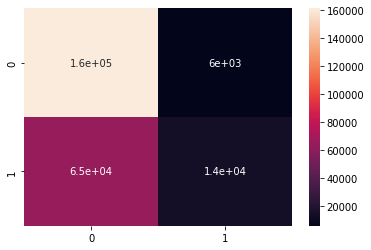

In [137]:
print('Train Confusion matrix:\n\n')
sns.heatmap(confusion_matrix(train_result,y_train),annot=True)

Test Confusion matrix:




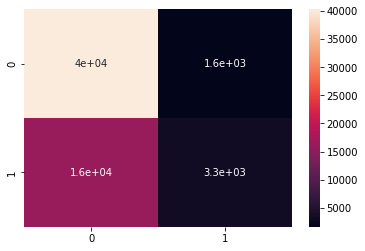

In [138]:
print('Test Confusion matrix:\n\n')
sns.heatmap(confusion_matrix(test_result,y_test),annot=True)